<a href="https://colab.research.google.com/github/valizcanos/ProcesosUnitarios/blob/main/6_Desinfeccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#**CINÉTICA DE LA DESINFECCIÓN**
<p>La destrucción de los microorganismos mediante desinfección es función tanto del tiempo de exposición al agente letal (tiempo de contacto) como del desinfectante usado.</p>

$t = {\frac 1 k} Log \left( \frac {N_{0}} {N_{t}} \right) $

$t$ : Tiempo de contacto<br>
$k$: Constante cinética de reacción $, \frac 1 t$ <br>
$N_0$: Número inicial de microorganismos <br>
$N_t$: Número de microorganismos viables en el tiempo t.

##**DECRETO 1575 DE 2007 - RESOLUCION 2115 DE 2007**

###**Artículo 11 Resolución 2115 de 2007**

<p>Parágrafo 1°. Como prueba complementaria se recomienda realizar la determinación de
microorganismos mesofílicos, cuyo valor máximo aceptable será de 100 UFC en 100 cm3. </p><br>

<p>Parágrafo 2°. Ninguna muestra de agua para consumo humano debe contener E.coli en 100
cm3 de agua, independientemente del método de análisis utilizado. </p><br>

<p>Parágrafo 3°. El valor aceptable para Giardia es de cero (0) Quistes y para Cryptosporidium
debe ser de cero (0) Ooquistes por volumen fijado según la metodología aplicada. </p><br>

<p>Unidades: #UFC/100cc</p><br>

#**Ejemplo 1**
<p>Estimar los tiempos de contacto para un desinfectante que desea alcanzar un 99% mortalidad de los microorganismos. La constante $k$ es de $1.6E-5$ $s^{-1}$</p><br>

<p>$ \% Mortalidad = \left( 1 - \frac {N_t}{N_0}\right) * 100$  </p><br> 

<p>$ {\frac {\% Mortalidad}{100}} - 1  = \left( - \frac {N_t}{N_0}\right)$  </p><br>

<p>$  1 - {\frac {\% Mortalidad}{100}}   = \left( \frac {N_t}{N_0}\right)$  </p><br>

<p>$  {\frac {100 - \% Mortalidad}{100}}   = \left( \frac {N_t}{N_0}\right)$  </p><br>

<p>$  {\frac {100}{100 - \% Mortalidad}}   = \left( \frac {N_0}{N_t}\right)$  </p><br>

<p>$  t = {\frac 1 k} Log \left( \frac {N_{0}} {N_{t}} \right) $  </p><br>

<p>$  t = {\frac 1 k} Log \left( {\frac {100}{100 - \% Mortalidad}} \right) $  </p><br>



In [2]:
Mortalidad = np.linspace(0,99, 100)

In [3]:
k = 1.6E-5

In [4]:
t = (1/k)*np.log10(100/(100-Mortalidad))

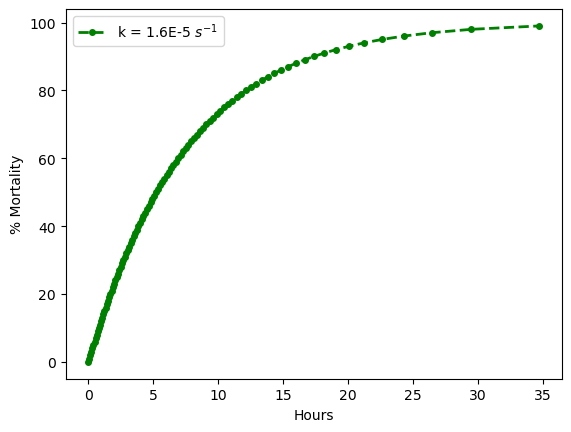

In [5]:
plt.plot(t/3600,Mortalidad,'go--', linewidth=2, markersize=4, label="k = 1.6E-5 $s^{-1}$")
plt.xlabel("Hours")
plt.ylabel("% Mortality")
plt.legend()
plt.show()

<p>Ahora evalue los % de mortalidad en 48 horas a diferentes constantes cinéticas entre 1.5E-5 y 1.9E-5 $s^{-1}$</p><br>

In [6]:
ks = np.linspace(1.5e-5, 1.9e-5, 10)

In [7]:
ts = np.linspace(0,48*3600, 100)

<p>$  t = {\frac 1 k} Log \left( {\frac {100}{100 - \% Mortalidad}} \right) $  </p><br>

<p>$  10^{tk} =   \left( {\frac {100}{100 - \% Mortalidad}} \right) $  </p><br>

<p>$ {100 - \% Mortalidad}  =   \left( {\frac {100}{10^{tk}} }\right) $  </p><br>

<p>$ { - \% Mortalidad}  =   \left( {\frac {100}{10^{tk}} }\right) - 100 $  </p><br>

<p>$ { \% Mortalidad}  =    100 - \left( {\frac {100}{10^{tk}} }\right)  $  </p><br>

In [8]:
def Mortalidades(t,k):
  for i in range(len(k)):
    expo = t*k[i]
    M = 100 - (100/(10**(expo)))
    plt.plot(t/3600,M, label=np.round(k[i],7))
    plt.ylabel("% Mortality")
    plt.xlabel("Hours")
    plt.legend()
    #plt.show()

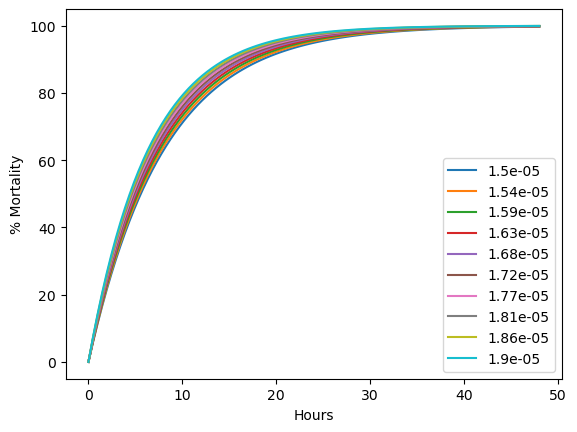

In [9]:
Mortalidades(ts,ks)

#**Para el Cloro**

<p>$  t^{2} = {\frac 2 k} Log \left( \frac {N_{0}} {N_{t}} \right) $  </p><br>

<p>$  t = \sqrt{{\frac 2 k} Log \left( \frac {N_{0}} {N_{t}} \right)} $  </p><br>

<p>$  t = \sqrt{{\frac 2 k} Log \left( {\frac {100}{100 - \% Mortalidad}} \right) }$  </p><br>

In [10]:
t = np.sqrt((2/k)*np.log10(100/(100-Mortalidad)))

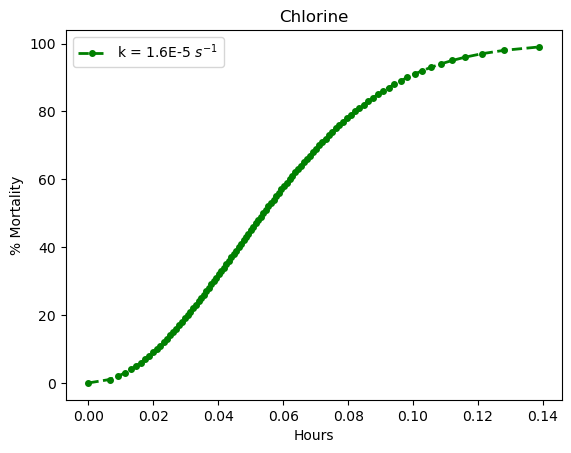

In [11]:
plt.plot(t/3600,Mortalidad,'go--', linewidth=2, markersize=4, label="k = 1.6E-5 $s^{-1}$")
plt.xlabel("Hours")
plt.ylabel("% Mortality")
plt.title("Chlorine")
plt.legend()
plt.show()

<p>$  t^{2} = {\frac 2 k} Log \left( {\frac {100}{100 - \% Mortalidad}} \right) $  </p><br>

<p>$  10^{kt^{2}/2} =   \left( {\frac {100}{100 - \% Mortalidad}} \right) $  </p><br>

<p>$ {100 - \% Mortalidad}  =   \left( {\frac {100}{10^{kt^{2}/2}} }\right) $  </p><br>

<p>$ { - \% Mortalidad}  =   \left( {\frac {100}{10^{kt^{2}/2}} }\right) - 100 $  </p><br>

<p>$ { \% Mortalidad}  =    100 - \left( {\frac {100}{10^{kt^{2}/2}} }\right)  $  </p><br>

In [12]:
def MortalidadesCloro(t,k):
  for i in range(len(k)):
    expo = ((t**2)*k[i])/2
    M = 100 - (100/(10**(expo)))
    plt.plot(t/3600,M, label=np.round(k[i],7))
    plt.ylabel("% Mortality")
    plt.xlabel("Hours")
    plt.legend()
    #plt.show()

C:\Users\valiz\AppData\Local\Temp\ipykernel_16688\1800912892.py:4: RuntimeWarning: overflow encountered in power
  M = 100 - (100/(10**(expo)))
C:\Users\valiz\AppData\Local\Temp\ipykernel_16688\1800912892.py:4: RuntimeWarning: overflow encountered in power
  M = 100 - (100/(10**(expo)))
C:\Users\valiz\AppData\Local\Temp\ipykernel_16688\1800912892.py:4: RuntimeWarning: overflow encountered in power
  M = 100 - (100/(10**(expo)))
C:\Users\valiz\AppData\Local\Temp\ipykernel_16688\1800912892.py:4: RuntimeWarning: overflow encountered in power
  M = 100 - (100/(10**(expo)))
C:\Users\valiz\AppData\Local\Temp\ipykernel_16688\1800912892.py:4: RuntimeWarning: overflow encountered in power
  M = 100 - (100/(10**(expo)))
C:\Users\valiz\AppData\Local\Temp\ipykernel_16688\1800912892.py:4: RuntimeWarning: overflow encountered in power
  M = 100 - (100/(10**(expo)))
C:\Users\valiz\AppData\Local\Temp\ipykernel_16688\1800912892.py:4: RuntimeWarning: overflow encountered in power
  M = 100 - (100/(10**(

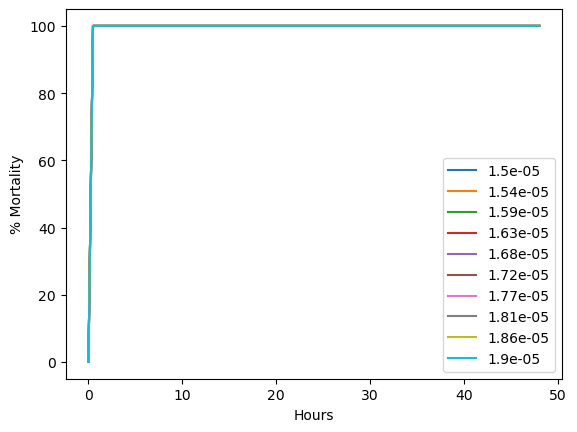

In [13]:
MortalidadesCloro(ts,ks)

In [14]:
ts2 = np.linspace(0,0.14*3600, 100)

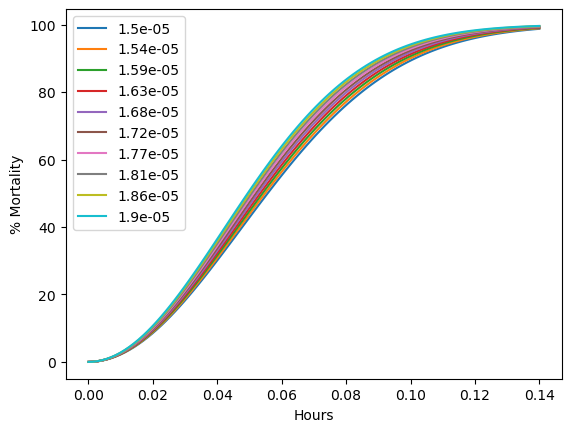

In [15]:
MortalidadesCloro(ts2,ks)